# 4D optimisation

This notebook shows how to load a model available in the models folder and use it as the unknown target function in a BOSS optimisation run.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from boss.bo.bo_main import BOMain
from utils import load_model, plot_slices

optimisation setup:

In [3]:
seed = 240618
normalise_scale = True  # note: default is false
num_init = 5
num_iter = 200
acqfn_name = 'elcb'
updatefreq = 10

optimisation tasks:

In [4]:
def f_0(x):
    return unknown_model_0.predict(np.atleast_2d(x))[0]

def f_1(x):
    return unknown_model_1.predict(np.atleast_2d(x))[0]

In [5]:
unknown_model_0 = load_model('../models/model_4D_E0.npz')
unknown_model_1 = load_model('../models/model_4D_E1.npz')

In [6]:
yrange_0 = [0, 20]
yrange_1 = [0, 1]

In [7]:
bounds = [[-50.0, 310.0]] * 4
bounds[1] = [-50.0, 70]  # second dimension has 1/3 period

run optimisation 1:

In [8]:
bo_1 = BOMain(
    f_0, 
    bounds,
    yrange=yrange_0,
    kernel='stdp',
    initpts=num_init,
    iterpts=num_iter,
    updatefreq=updatefreq,
    acqfn_name=acqfn_name,
    ynorm=normalise_scale,
    seed=seed,
    outfile='boss_4D_E0.out',
    rstfile='boss_4D_E0.rst',
)

In [9]:
%time res_1 = bo_1.run()

CPU times: user 20min 43s, sys: 3min 51s, total: 24min 35s
Wall time: 24min 8s


In [10]:
res_1.get_best_acq()

(ObsAr([ 56.41825979,  61.74610952, 204.44796984, 180.15140222]),
 array([15.7934202]))

In [11]:
[res_1.select('x_glmin', -1), res_1.select('mu_glmin', -1)]

[array([ 56.41825979,  61.74610952, 204.44796984, 180.15140222]),
 15.793501681107147]

In [12]:
f_0(res_1.select('x_glmin', -1))

array([[15.7934202]])

plot:

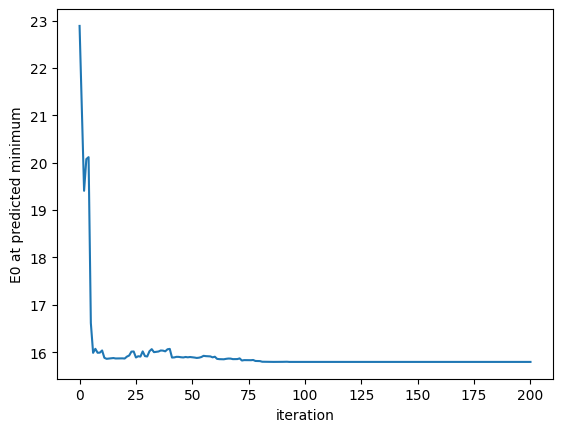

In [13]:
fmin = f_0(res_1['x_glmin'])
plt.plot(fmin)
plt.ylabel('E0 at predicted minimum')
plt.xlabel('iteration');

plot model at predicted minimum:

In [14]:
pred = lambda x: bo_1.model.predict(np.atleast_2d(x))[0]

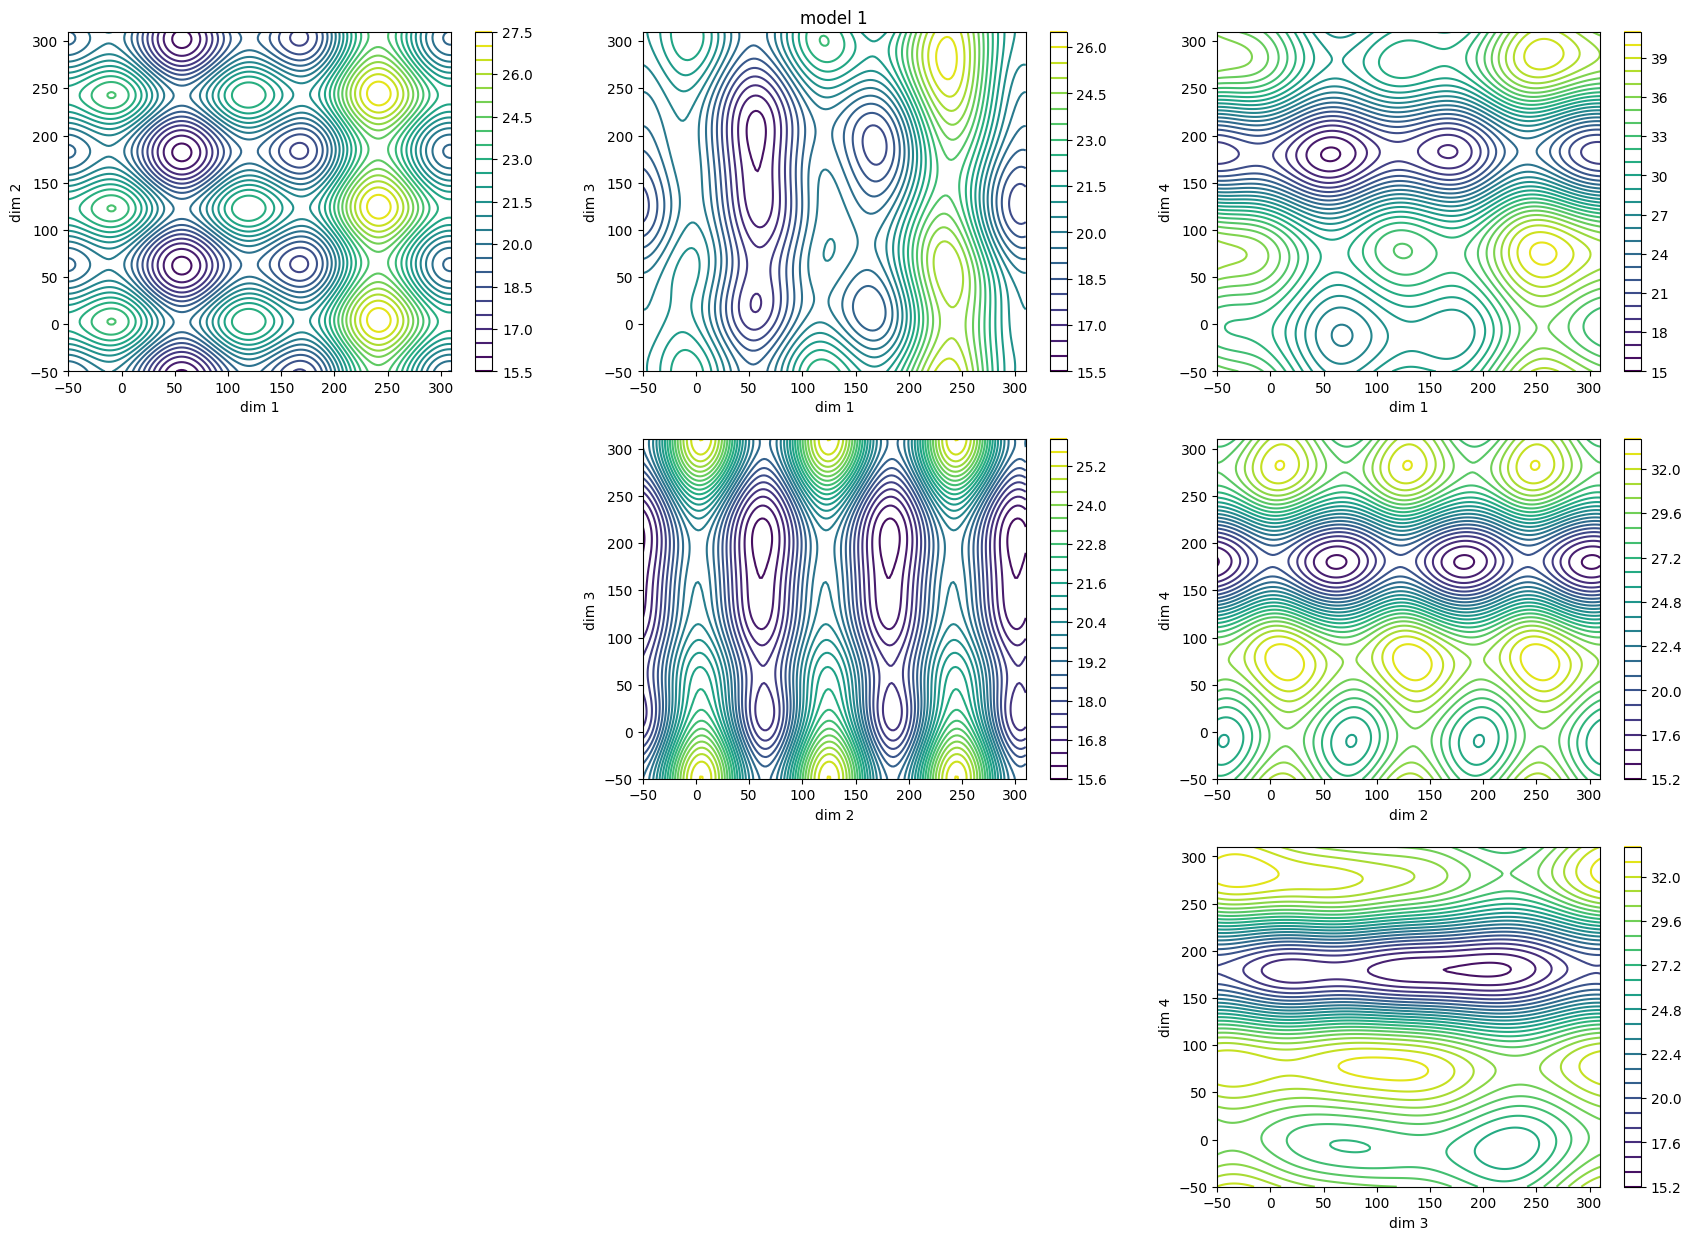

In [15]:
plt.figure(figsize=(3*7, 3*5))
xp = np.linspace(-50, 310, 181)
plt.subplot(3,3,2)
plt.title('model 1');
plot_slices(pred, xp, res_1.select('x_glmin', -1))

run optimisation 2:

In [16]:
bo_2 = BOMain(
    f_1, 
    bounds,
    yrange=yrange_1,
    kernel='stdp',
    initpts=num_init,
    iterpts=num_iter,
    updatefreq=updatefreq,
    acqfn_name=acqfn_name,
    ynorm=normalise_scale,
    seed=seed,
    outfile='boss_4D_E1.out',
    rstfile='boss_4D_E1.rst',
)

In [17]:
%time res_2 = bo_2.run()

CPU times: user 20min 40s, sys: 3min 42s, total: 24min 22s
Wall time: 25min 14s


In [18]:
res_2.get_best_acq()

(ObsAr([237.92802952,  59.75597439,  60.39535589,  -1.03985869]),
 array([-8803.27705153]))

In [19]:
[res_2.select('x_glmin', -1), res_2.select('mu_glmin', -1)]

[array([ 2.37518707e+02,  5.52958835e+01,  6.08373249e+01, -7.10550403e-03]),
 -8803.27963538832]

In [20]:
f_1(res_2.select('x_glmin', -1))

array([[-8803.27984845]])

plot:

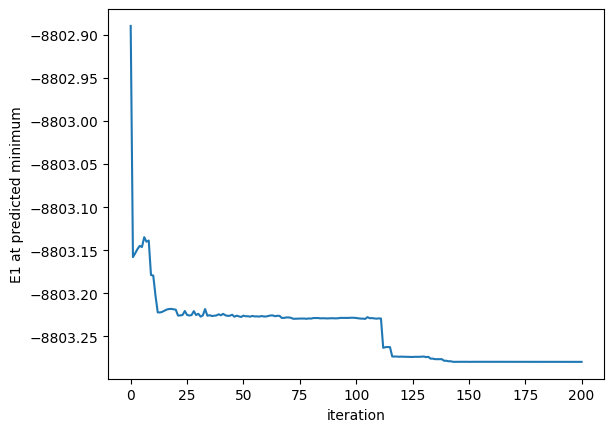

In [21]:
fmin = f_1(res_2['x_glmin'])
plt.plot(fmin)
plt.ylabel('E1 at predicted minimum')
plt.xlabel('iteration');

plot model at predicted minimum:

In [22]:
pred = lambda x: bo_2.model.predict(np.atleast_2d(x))[0]

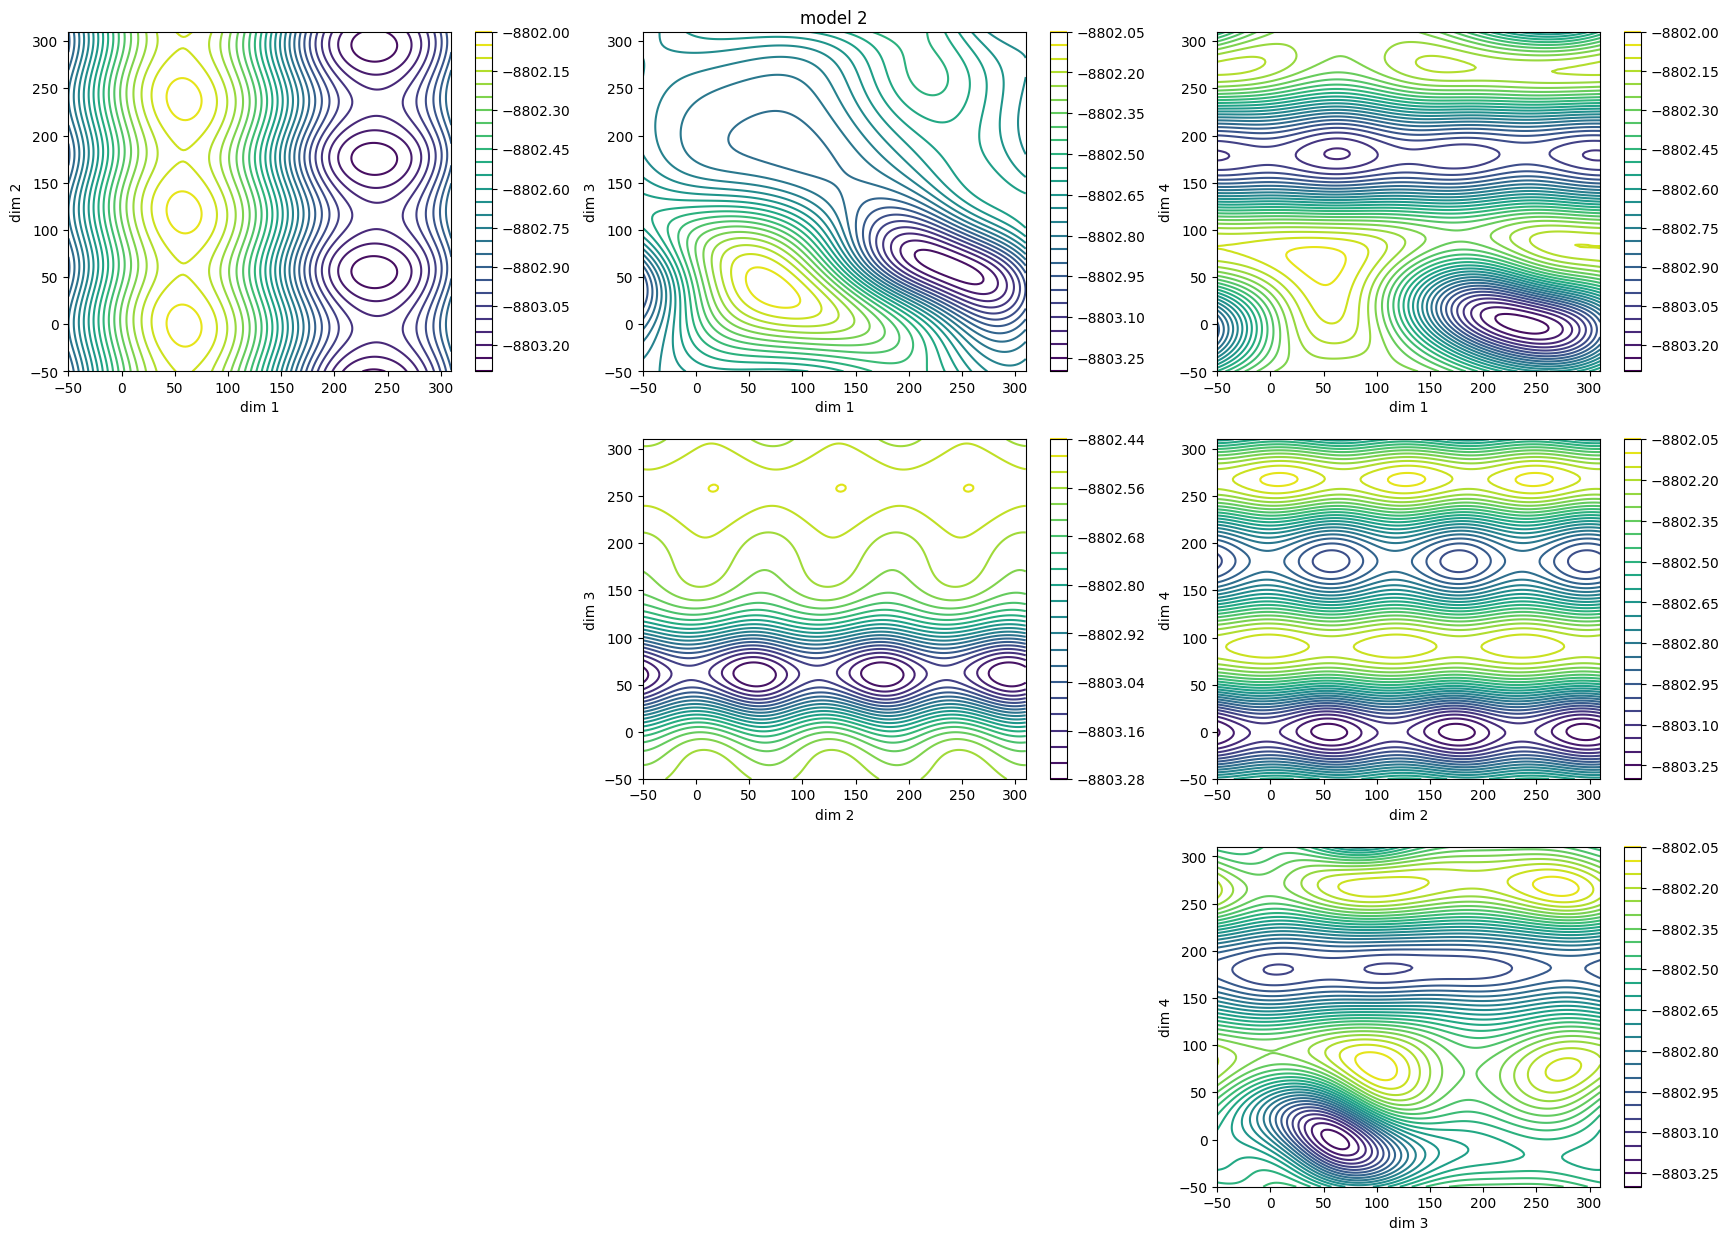

In [23]:
plt.figure(figsize=(3*7, 3*5))
xp = np.linspace(-50, 310, 181)
plt.subplot(3,3,2)
plt.title('model 2');
plot_slices(pred, xp, res_2.select('x_glmin', -1))

compare minima:

In [24]:
res_1.select('x_glmin', -1)

array([ 56.41825979,  61.74610952, 204.44796984, 180.15140222])

In [25]:
res_2.select('x_glmin', -1)

array([ 2.37518707e+02,  5.52958835e+01,  6.08373249e+01, -7.10550403e-03])

In [26]:
[float(f_0(res_1.select('x_glmin', -1))), float(f_0(res_2.select('x_glmin', -1)))]

[15.793420200775948, 20.703726832483447]

In [27]:
[float(f_1(res_1.select('x_glmin', -1))), float(f_1(res_2.select('x_glmin', -1)))]

[-8803.227238847514, -8803.279848445132]